### Creating a simple word cloud in python from existing text file
* Source blog: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
* Data set: vedanta.csv - scraped from YouTube comments for a particualr video

In [23]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Step 1: Load data ie. only text comments columns from vedanta.csv
Since there is no column header - we will import data & insert column names. "Comments" will be the text column we will use for word cloud.

In [60]:
# Load vedanta.csv with coumn names as: comments
vedanta=pd.read_csv("vedanta.csv", names =["Comments","Author","Replies","Likes"])
vedanta

,Comments,Author,Replies,Likes
0,During the lockdown I have addicted to listen ...,haresh gohil,0,1
1,How do I join the study group pls ..,Anu K,0,0
2,Namaskaram Guru 🙏🙏🙏,Pramod S,0,1
3,"I am keen to join the vedanta study group, how...",omprakash seeba,0,0
4,"Hari Om Swamiji, IAM from Karnataka India. Swa...",Nagavalli S,0,0
...,...,...,...,...
101,How do I join the Vedanta Study Group?,Jo Moreau,1,33
102,🙏🙏Pranams Swamiji,shalini,0,0
103,🙏🙏🙏\nShri Gurubhyo Namaha,Lakshmi Subramaniam,0,0
104,Namaste swamiji,Lakshmi Pradeep,0,0


In [61]:
#Drop all columns except Comments
vedanta.drop(['Author','Replies','Likes'],axis=1,inplace=True)
text=vedanta
text

,Comments
0,During the lockdown I have addicted to listen ...
1,How do I join the study group pls ..
2,Namaskaram Guru 🙏🙏🙏
3,"I am keen to join the vedanta study group, how..."
4,"Hari Om Swamiji, IAM from Karnataka India. Swa..."
...,...
101,How do I join the Vedanta Study Group?
102,🙏🙏Pranams Swamiji
103,🙏🙏🙏\nShri Gurubhyo Namaha
104,Namaste swamiji


In [62]:
# Data Cleansing
# Remove emoticons from above text using re (Regular Expressions) python library
import re
text['Comments'] = text['Comments'].str.replace('[^\w\s]','', flags=re.UNICODE)
text = text.replace('[^a-zA-Z]','')
text=text.replace(to_replace=r',,', value='', regex=True)
text

,Comments
0,During the lockdown I have addicted to listen ...
1,How do I join the study group pls
2,Namaskaram Guru
3,I am keen to join the vedanta study group how ...
4,Hari Om Swamiji IAM from Karnataka India Swami...
...,...
101,How do I join the Vedanta Study Group
102,Pranams Swamiji
103,\nShri Gurubhyo Namaha
104,Namaste swamiji


In [55]:
# Check for null values
pd.isna(text).sum()

Comments    0
dtype: int64

In [56]:
# Ensure Comments column is all string objects
text['Comments']=text['Comments'].apply(str)
text.dtypes

Comments    object
dtype: object

In [63]:
#comments=text['Comments'].tolist()
# Collate the values of the Comments column
comments=text['Comments'].values
comments

array(['During the lockdown I have addicted to listen swami sravapriyanand lectures',
       'How do I join the study group pls ', 'Namaskaram Guru ',
       'I am keen to join the vedanta study group how do I get enrolled',
       'Hari Om Swamiji IAM from Karnataka India SwamijiI was listening to your vedantha Sara text first part Quite interestingafter that I am not able  to trace out next partskindly guide me how I should access to thisDhanyavadagalu Swamiji',
       'Please keep uploading the lessons Thank you',
       'As you say in a dream there are many people and places but none of them are other than the dreaming self They merely seem real\nSo if the world is unreal except for consciousness then this must also apply to OTHER apparent consciousnesses as well Otherwise you have Samkhya or dualism\nErgo Advaita is solipsistic in its pure form The dream of Vishnu\nSorry to bring this up ',
       'AM JUST CATCHING THE POINTER\nSEEKING BLESSINGS FROM SWAMIJI\nJAI RAMAKRISHNA',
   

#### 2. Create word cloud
We use "Word cloud" library to plot the words in a cloud. The arguments for this library are
width/height: You can change the word cloud dimension to your preferred width and height with these.

A. random_state: If you don’t this set this to a number of your choice, you are likely to get a slightly different word cloud every time you run the same script on the same input data. By setting this parameter, you ensure reproducibility of the exact same word cloud. You could play around with random numbers until you find the one that results in the word cloud you like.

B. background_colour: ‘white’ and ‘black’ are common background colours. If you would like to explore more colours, this may come in handy. Please note that some colours may not work. Hope you will find something you fancy.

C. colormap: With this argument, you can set up the colour theme that the words are displayed in. There are many beautiful Matplotlib colormaps to choose from. Some of my favourites are ‘rainbow’, ‘seismic’, ‘Pastel1’ and Pastel2’.

D. collocations: Set this to False to ensure that the word cloud doesn’t appear as if it contains any duplicate words. Otherwise, you may see ‘web’, ‘scraping’ and ‘web scraping’ as a collocation in the word cloud, giving an impression that words have been duplicated.

E. stopwords: Stopwords are common words which provide little to no value to the meaning of the text. ‘We’, ‘are’ and ‘the’ are examples of stopwords. I have explained stopwords in more detail here (scroll to ‘STEP3. REMOVE STOPWORDS’ section). Here, we used STOPWORDS from the wordcloud package. To see the set of stopwords, use print(STOPWORDS) and to add custom stopwords to this set, use this template STOPWORDS.update(['word1', 'word2']), replacing word1 and word2 with your custom stopwords before generating a word cloud.

There are other arguments that you can also customise. Check out https://github.com/amueller/word_cloud for more information.

In [64]:
# Import package
from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

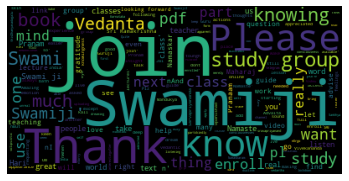

In [68]:
# Simple Word cloud
wordcloud = WordCloud().generate(str(comments))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

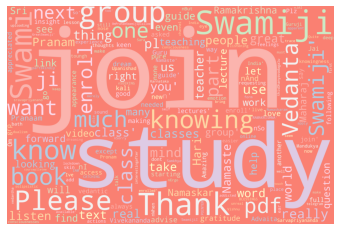

In [67]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(str(comments))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

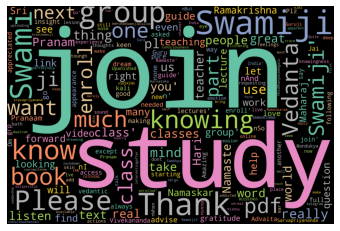

In [69]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='black', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS).generate(str(comments))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()